#üìå Extracci√≥n

In [7]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import requests
import json
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n para visualizaciones
plt.style.use('fivethirtyeight')
sns.set_palette("Set2")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Definimos la URL de la API
url_api = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Realizamos la petici√≥n a la API
print("Extrayendo datos de la API...")
response = requests.get(url_api)

# Verificamos si la petici√≥n fue exitosa
if response.status_code == 200:
    print("Conexi√≥n exitosa a la API")
    # Convertimos los datos JSON a un diccionario de Python
    data = json.loads(response.text)

    # Convertimos el diccionario a un DataFrame de pandas
    df = pd.DataFrame(data)

    print(f"Datos extra√≠dos exitosamente. Dimensiones del DataFrame: {df.shape}")

    # Mostramos las primeras filas del DataFrame para verificar la extracci√≥n
    print("\nPrimeras 5 filas del DataFrame:")
    display(df.head())
else:
    print(f"Error al conectarse a la API. C√≥digo de estado: {response.status_code}")

# Mostramos informaci√≥n sobre la estructura del DataFrame
print("\nEstructura del DataFrame:")
df.info()

# Mostramos los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df.dtypes)

Extrayendo datos de la API...
Conexi√≥n exitosa a la API
Datos extra√≠dos exitosamente. Dimensiones del DataFrame: (7267, 6)

Primeras 5 filas del DataFrame:


customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...


Estructura del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Tipos de datos por columna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


#üîß Transformaci√≥n

In [8]:
# 2.1 An√°lisis inicial de datos y detecci√≥n de problemas

# Flatten the nested dictionaries into new columns
df_flat = pd.json_normalize(data)

# Now use the flattened DataFrame for further processing
# Verificamos valores nulos en el DataFrame
print("Cantidad de valores nulos por columna:")
print(df_flat.isnull().sum())

# Verificamos valores duplicados
duplicados = df_flat.duplicated().sum()
print(f"\nCantidad de filas duplicadas: {duplicados}")

# Analizamos valores √∫nicos en columnas categ√≥ricas
print("\nValores √∫nicos en columnas categ√≥ricas:")
for columna in df_flat.select_dtypes(include=['object']).columns:
    print(f"{columna}: {df_flat[columna].unique()}")

# 2.2 Limpieza y transformaci√≥n de datos

# Creamos una copia del DataFrame para no modificar el original
df_clean = df_flat.copy()

# Convertimos SeniorCitizen de num√©rico (0/1) a categ√≥rico (No/S√≠)
df_clean['customer.SeniorCitizen'] = df_clean['customer.SeniorCitizen'].map({0: 'No', 1: 'Si'})

# Transformamos los valores de las columnas categ√≥ricas
# Para estandarizar y facilitar el an√°lisis
binary_columns = ['customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling', 'Churn']
for col in binary_columns:
    df_clean[col] = df_clean[col].map({'Yes': 'Si', 'No': 'No'})

# Transformamos las columnas de servicios con valores 'No phone service' o 'No internet service'
service_columns = ['phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']
for col in service_columns:
    df_clean[col] = df_clean[col].replace({'No phone service': 'No', 'No internet service': 'No'})
    df_clean[col] = df_clean[col].map({'Yes': 'Si', 'No': 'No'})

# Verificamos la existencia de valores inconsistentes en la columna 'tenure'
print("\nEstad√≠sticas de la columna tenure:")
print(df_clean['customer.tenure'].describe())

# Verificamos la existencia de valores inconsistentes en las columnas de cargos
print("\nEstad√≠sticas de la columna Charges.Monthly:")
print(df_clean['account.Charges.Monthly'].describe())

print("\nEstad√≠sticas de la columna Charges.Total:")
print(df_clean['account.Charges.Total'].describe())

# Convert 'account.Charges.Total' to numeric, coercing errors
df_clean['account.Charges.Total'] = pd.to_numeric(df_clean['account.Charges.Total'], errors='coerce')

# Fill missing 'account.Charges.Total' with 0
df_clean['account.Charges.Total'] = df_clean['account.Charges.Total'].fillna(0)


# 2.3 Creaci√≥n de nuevas variables

# Creamos la columna 'Cuentas_Diarias' dividiendo los cargos mensuales por 30
df_clean['Cuentas_Diarias'] = df_clean['account.Charges.Monthly'] / 30
print("\nEstad√≠sticas de la nueva columna Cuentas_Diarias:")
print(df_clean['Cuentas_Diarias'].describe())

# Creamos una columna con la cantidad de servicios contratados por cliente
servicio_columnas = ['phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup',
                   'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']

# Inicializamos la columna de servicios contratados con 0
df_clean['CantidadServicios'] = 0

# Sumamos 1 por cada servicio contratado (valor = 'Si')
for col in servicio_columnas:
    df_clean['CantidadServicios'] += (df_clean[col] == 'Si').astype(int)

print("\nEstad√≠sticas de la nueva columna CantidadServicios:")
print(df_clean['CantidadServicios'].describe())

# Creamos categor√≠as de antig√ºedad del cliente
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12 meses', '13-24 meses', '25-36 meses', '37-48 meses', '49-60 meses', '61-72 meses']
df_clean['CategoriaAntiguedad'] = pd.cut(df_clean['customer.tenure'], bins=bins, labels=labels, right=True)

print("\nDistribuci√≥n de clientes por categor√≠a de antig√ºedad:")
print(df_clean['CategoriaAntiguedad'].value_counts())

# 2.4 Codificaci√≥n de variables categ√≥ricas para an√°lisis estad√≠stico
# Creamos una copia para an√°lisis num√©ricos
df_numeric = df_clean.copy()

# Codificamos las variables binarias
binary_columns = ['customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity',
                 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
                 'internet.StreamingMovies', 'account.PaperlessBilling', 'Churn', 'customer.SeniorCitizen']

for col in binary_columns:
    df_numeric[col] = df_numeric[col].map({'Si': 1, 'No': 0})

# Codificamos 'gender' usando dummy variables
df_numeric = pd.get_dummies(df_numeric, columns=['customer.gender'], drop_first=True)

# Codificamos 'Contract' usando dummy variables
df_numeric = pd.get_dummies(df_numeric, columns=['account.Contract'], drop_first=True)

# Codificamos 'PaymentMethod' usando dummy variables
df_numeric = pd.get_dummies(df_numeric, columns=['account.PaymentMethod'], drop_first=True)

# Codificamos 'InternetService' usando dummy variables
df_numeric = pd.get_dummies(df_numeric, columns=['internet.InternetService'], drop_first=True)

# Revisamos el DataFrame con las nuevas columnas codificadas
print("\nColumnas del DataFrame num√©rico:")
print(df_numeric.columns.tolist())

# Verificamos que no haya valores nulos despu√©s de las transformaciones
print("\nCantidad de valores nulos en el DataFrame transformado:")
print(df_numeric.isnull().sum().sum())

# Mostramos las primeras filas del DataFrame transformado
print("\nPrimeras filas del DataFrame transformado:")
display(df_clean.head())

Cantidad de valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Cantidad de filas duplicadas: 0

Valores √∫nicos en columnas categ√≥ricas:
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
p

customerID Churn customer.gender customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                     No               Si   
1  0003-MKNFE    No            Male                     No               No   
2  0004-TLHLJ    Si            Male                     No               No   
3  0011-IGKFF    Si            Male                     Si               Si   
4  0013-EXCHZ    Si          Female                     Si               Si   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                  Si                9                 Si                  No   
1                  No                9                 Si                  Si   
2                  No                4                 Si                  No   
3                  No               13                 Si                  No   
4                  No                3                 Si                  No   

  internet.InternetService  ... internet.StreamingTV internet.StreamingMovies  \
0                      DSL  ...                   Si                       No   
1                      DSL  ...                   No                       Si   
2              Fiber optic  ...                   No                       No   
3              Fiber optic  ...                   Si                       Si   
4              Fiber optic  ...                   Si                       No   

  account.Contract account.PaperlessBilling account.PaymentMethod  \
0         One year                       Si          Mailed check   
1   Month-to-month                       No          Mailed check   
2   Month-to-month                       Si      Electronic check   
3   Month-to-month                       Si      Electronic check   
4   Month-to-month                       Si          Mailed check   

  account.Charges.Monthly account.Charges.Total Cuentas_Diarias  \
0                    65.6                593.30        2.186667   
1                    59.9                542.40        1.996667   
2                    73.9                280.85        2.463333   
3                    98.0               1237.85        3.266667   
4                    83.9                267.40        2.796667   

  CantidadServicios  CategoriaAntiguedad  
0                 4           0-12 meses  
1                 3           0-12 meses  
2                 2           0-12 meses  
3                 5          13-24 meses  
4                 3           0-12 meses  

[5 rows x 24 columns]

#üìä Carga y an√°lisis

Estad√≠sticas descriptivas para variables num√©ricas:


customer.tenure  account.Charges.Monthly  account.Charges.Total  \
count      7267.000000              7267.000000            7267.000000   
mean         32.346498                64.720098            2277.182035   
std          24.571773                30.129572            2268.648587   
min           0.000000                18.250000               0.000000   
25%           9.000000                35.425000             396.200000   
50%          29.000000                70.300000            1389.200000   
75%          55.000000                89.875000            3778.525000   
max          72.000000               118.750000            8684.800000   

       Cuentas_Diarias  CantidadServicios  
count      7267.000000        7267.000000  
mean          2.157337           3.358745  
std           1.004319           2.062729  
min           0.608333           0.000000  
25%           1.180833           1.000000  
50%           2.343333           3.000000  
75%           2.995833           5.000000  
max           3.958333           8.000000


Distribuci√≥n de clientes por estado de Churn:
Churn
No    5174
Si    1869
Name: count, dtype: int64

Porcentaje de Churn: 26.54%
Porcentaje de No Churn: 73.46%


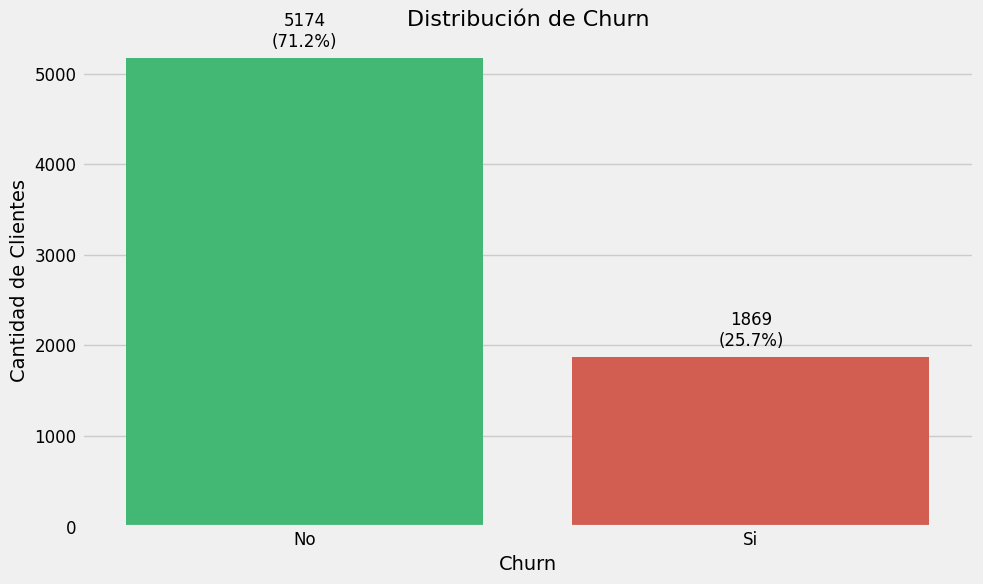

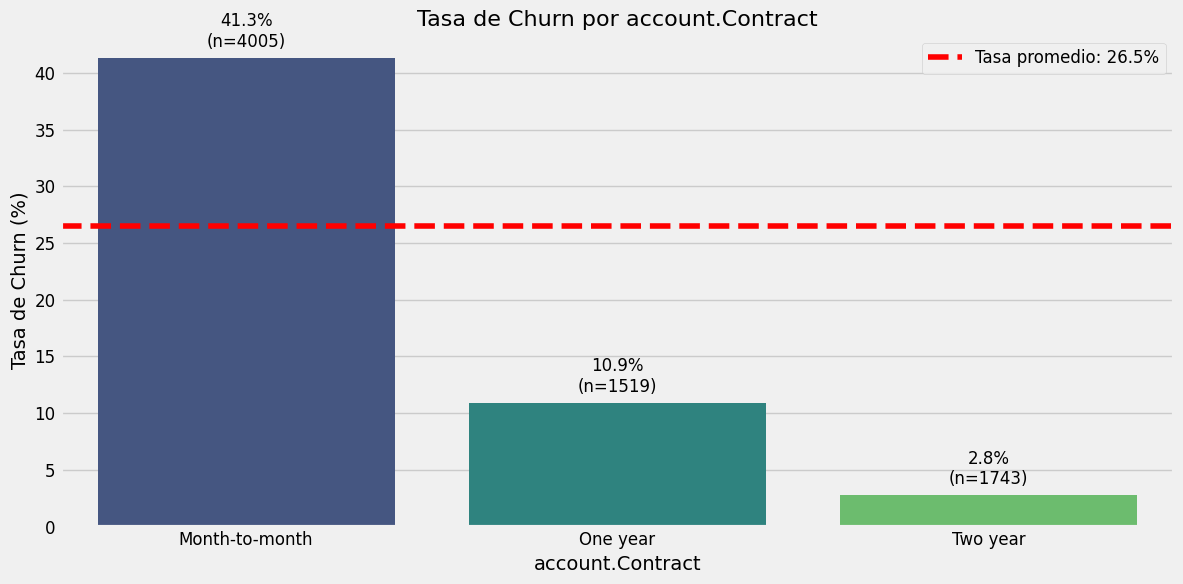


Tasa de Churn por account.Contract:


account.Contract      Churn  Count
0   Month-to-month  41.323346   4005
1         One year  10.928242   1519
2         Two year   2.753873   1743

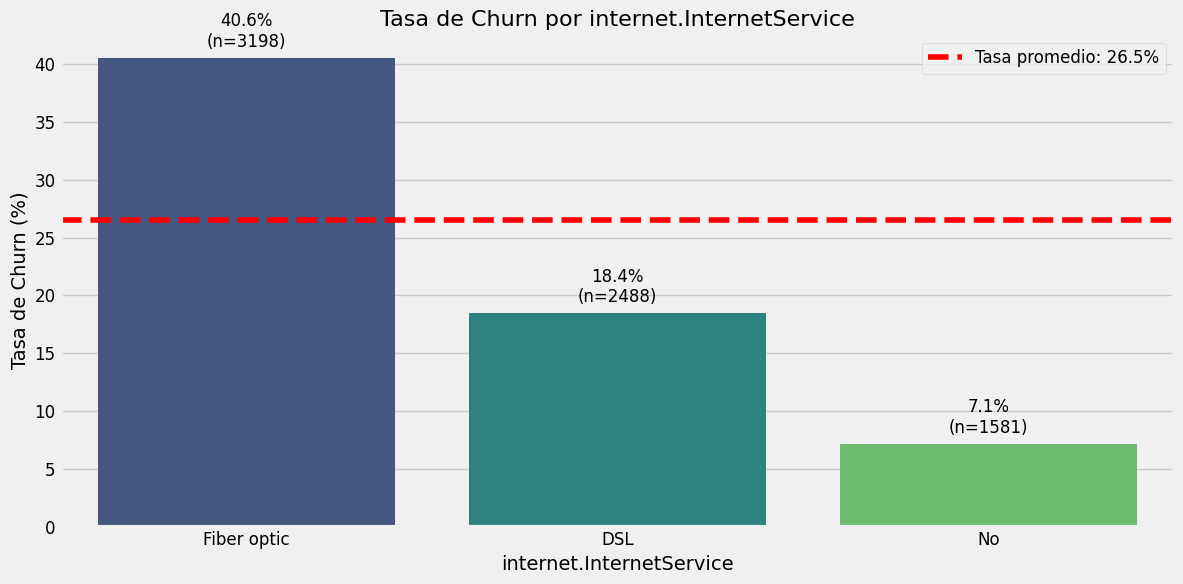


Tasa de Churn por internet.InternetService:


internet.InternetService      Churn  Count
0              Fiber optic  40.556598   3198
1                      DSL  18.448553   2488
2                       No   7.147375   1581

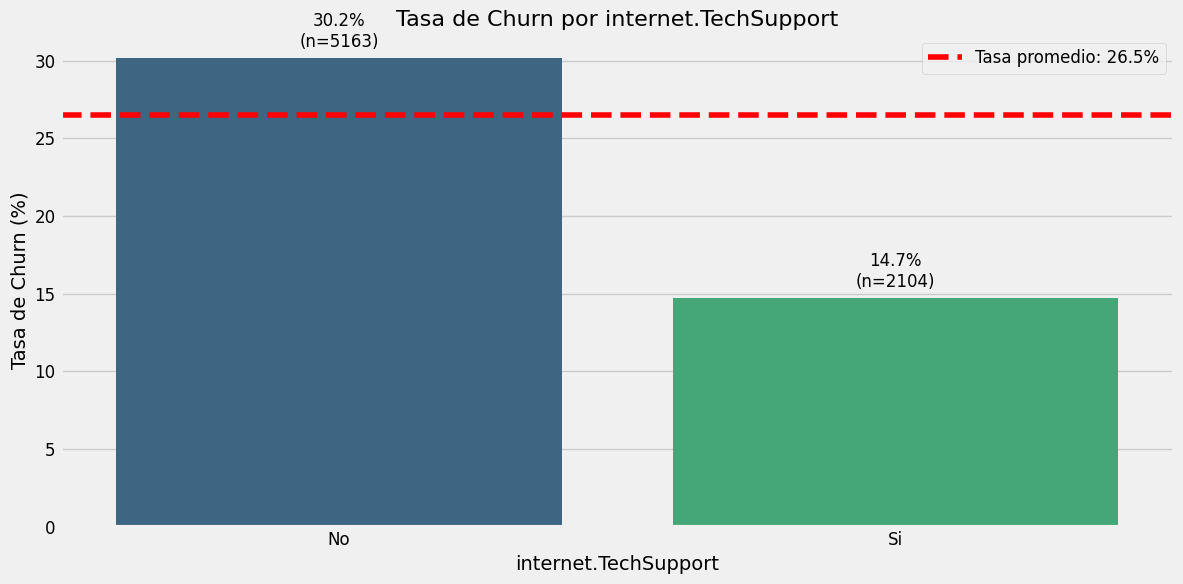


Tasa de Churn por internet.TechSupport:


internet.TechSupport      Churn  Count
0                   No  30.195623   5163
1                   Si  14.733840   2104

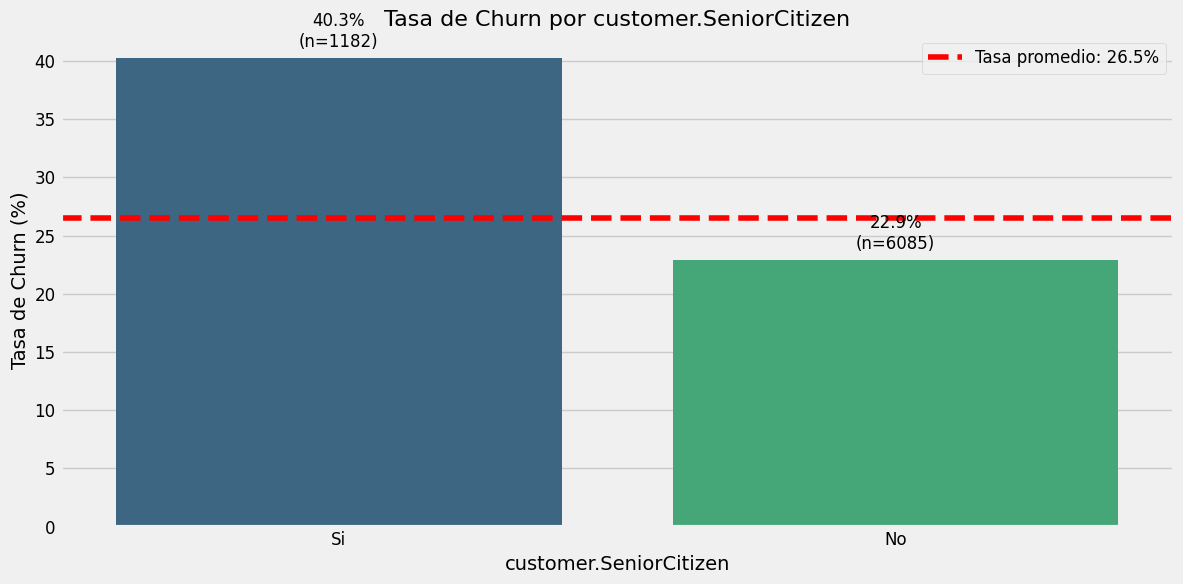


Tasa de Churn por customer.SeniorCitizen:


customer.SeniorCitizen      Churn  Count
0                     Si  40.270728   1182
1                     No  22.892358   6085

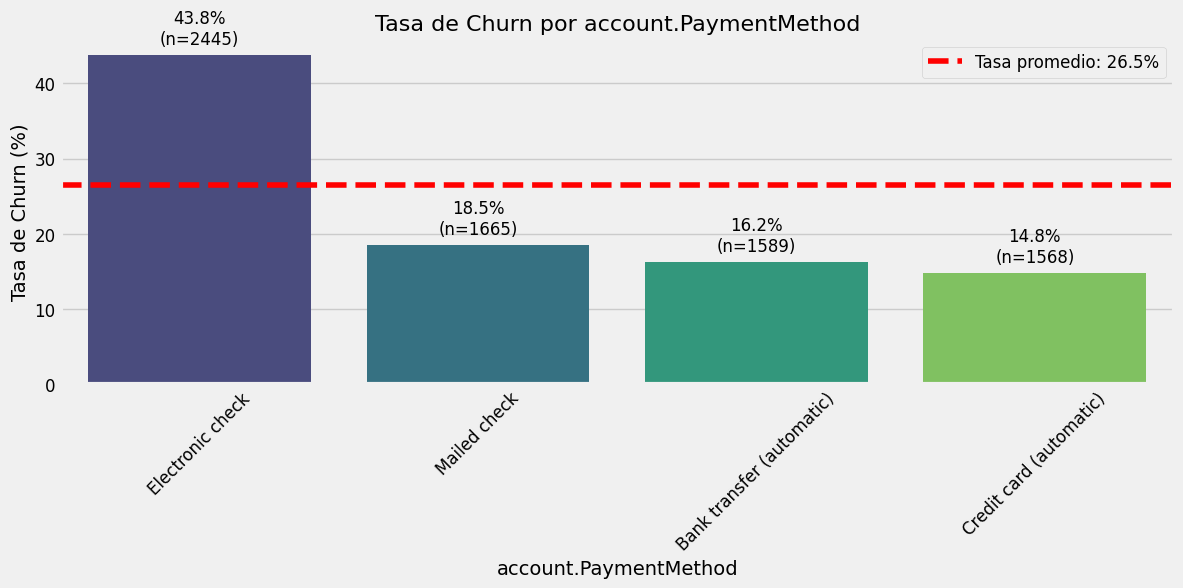


Tasa de Churn por account.PaymentMethod:


account.PaymentMethod      Churn  Count
0           Electronic check  43.803681   2445
1               Mailed check  18.498498   1665
2  Bank transfer (automatic)  16.236627   1589
3    Credit card (automatic)  14.795918   1568

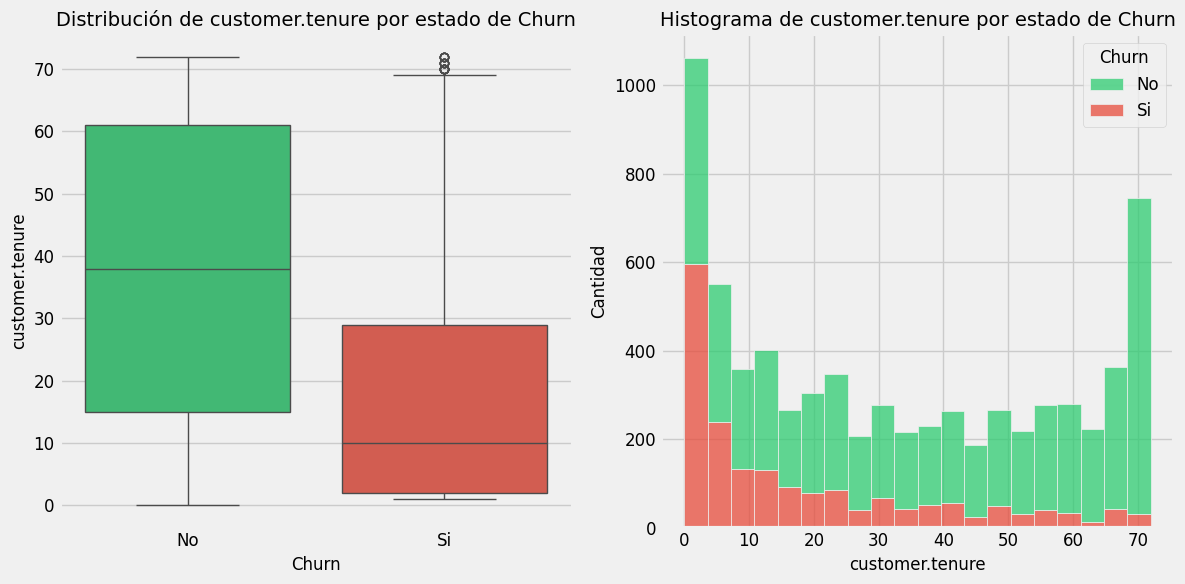


Estad√≠sticas de customer.tenure por estado de Churn:


count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Si     1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

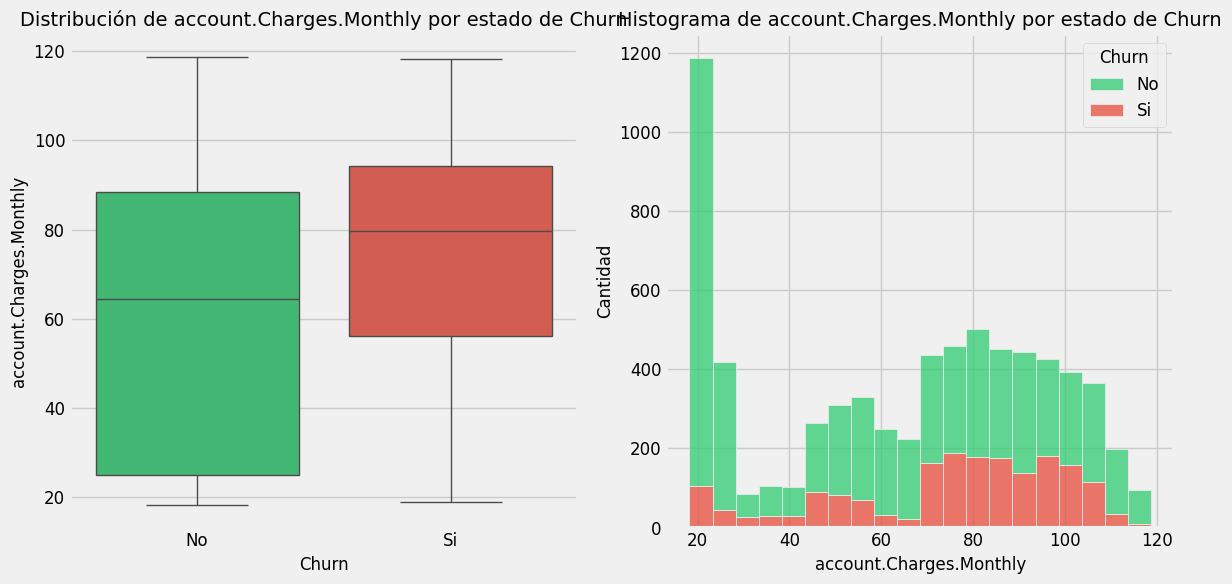


Estad√≠sticas de account.Charges.Monthly por estado de Churn:


count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Si     1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35

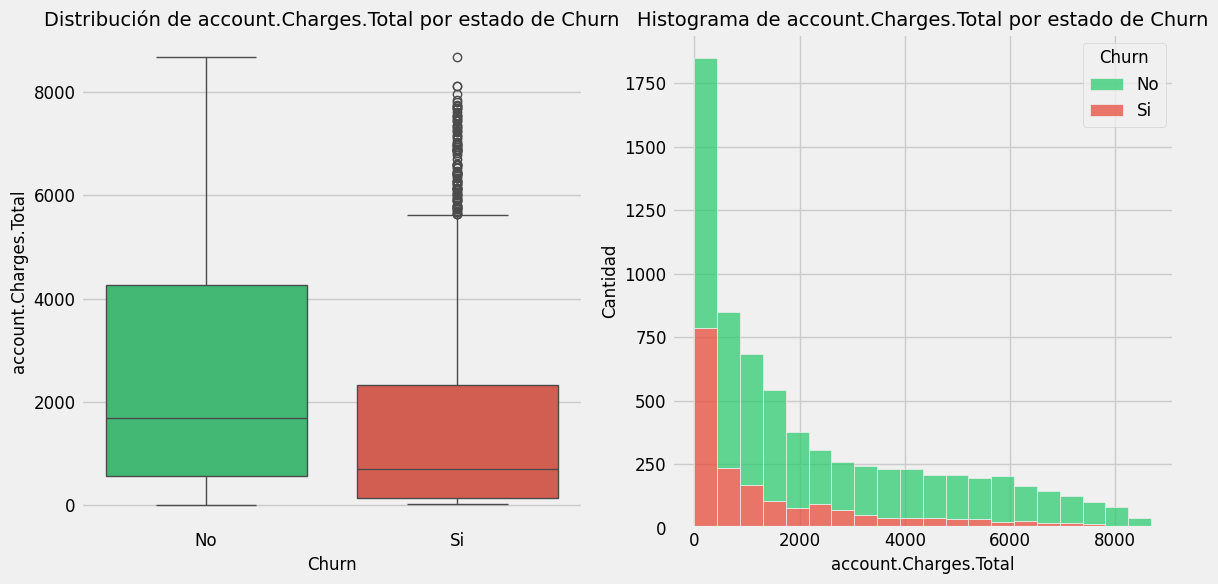


Estad√≠sticas de account.Charges.Total por estado de Churn:


count         mean          std    min    25%       50%      75%  \
Churn                                                                      
No     5174.0  2549.911442  2329.954215   0.00  572.9  1679.525  4262.85   
Si     1869.0  1531.796094  1890.822994  18.85  134.5   703.550  2331.30   

           max  
Churn           
No     8672.45  
Si     8684.80

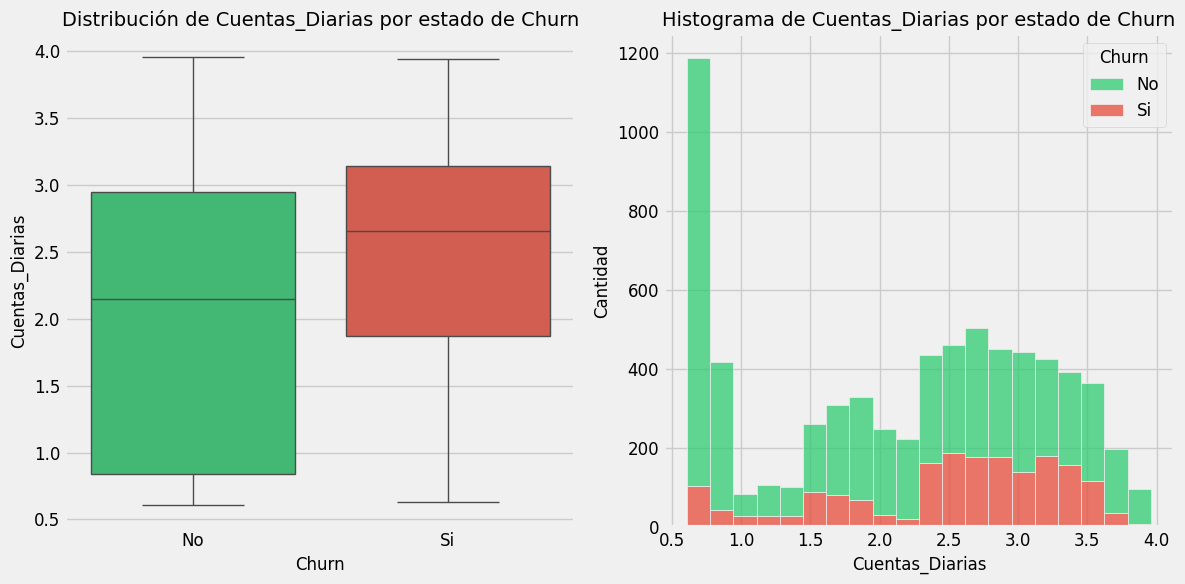


Estad√≠sticas de Cuentas_Diarias por estado de Churn:


count      mean       std       min       25%     50%       75%  \
Churn                                                                     
No     5174.0  2.042171  1.036422  0.608333  0.836667  2.1475  2.946667   
Si     1869.0  2.481378  0.822202  0.628333  1.871667  2.6550  3.140000   

            max  
Churn            
No     3.958333  
Si     3.945000

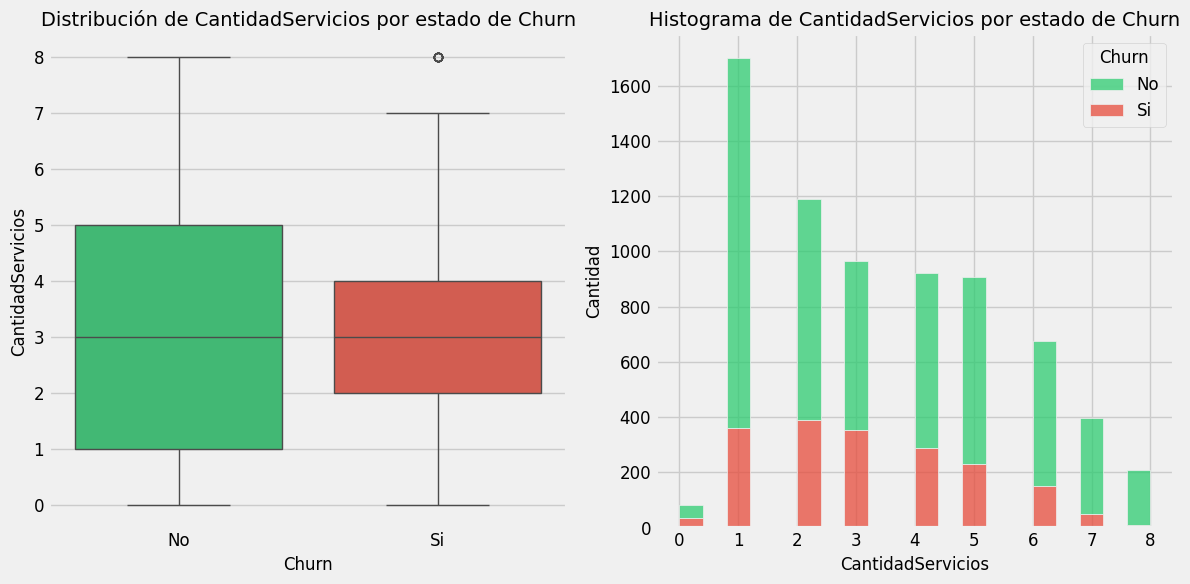


Estad√≠sticas de CantidadServicios por estado de Churn:


count      mean       std  min  25%  50%  75%  max
Churn                                                     
No     5174.0  3.446270  2.156391  0.0  1.0  3.0  5.0  8.0
Si     1869.0  3.132156  1.754828  0.0  2.0  3.0  4.0  8.0

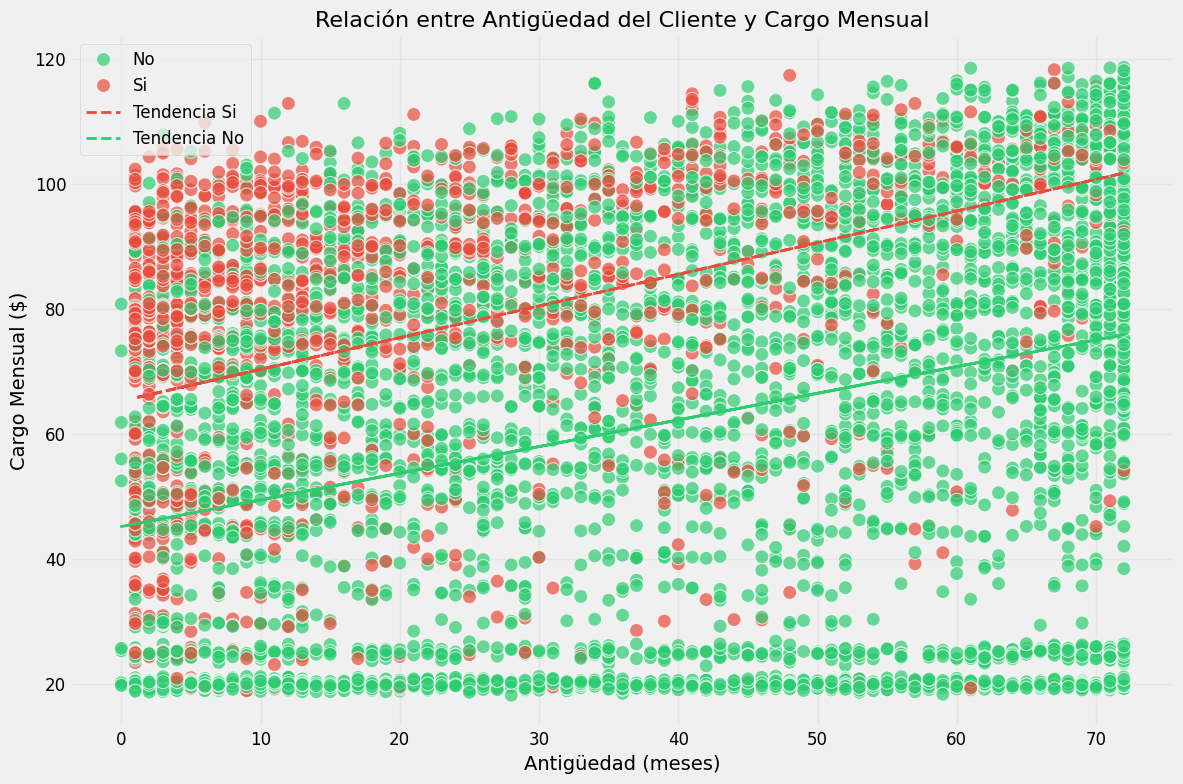

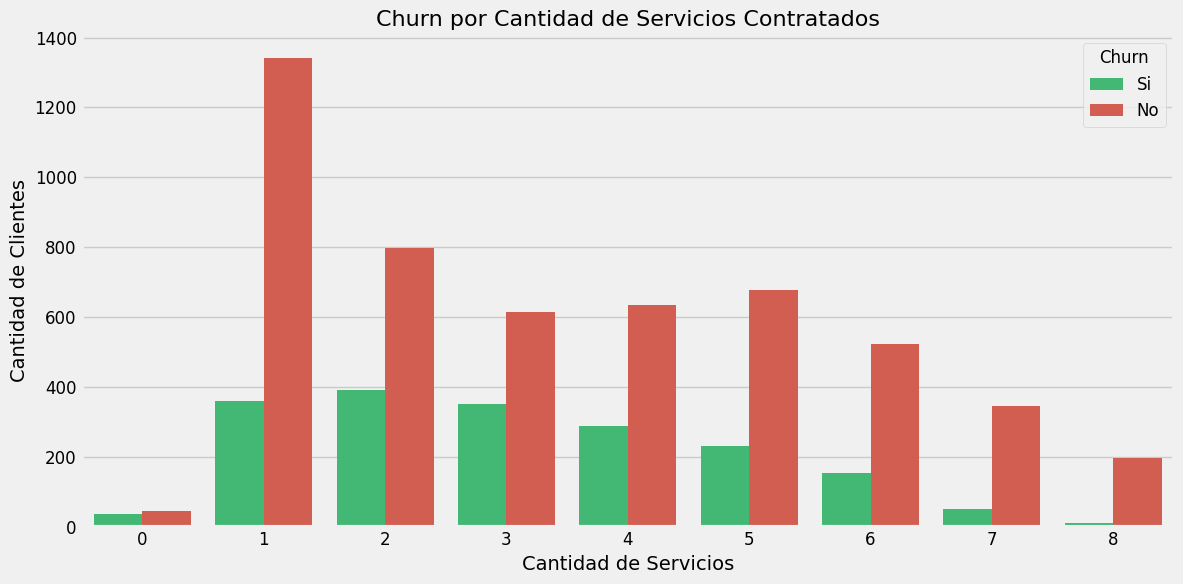


Tasa de Churn por Cantidad de Servicios:


CantidadServicios      Churn
0                  0  43.209877
1                  1  20.339943
2                  2  31.784841
3                  3  35.412475
4                  4  30.421053
5                  5  24.973089
6                  6  21.745351
7                  7  12.009804
8                  8   5.140187

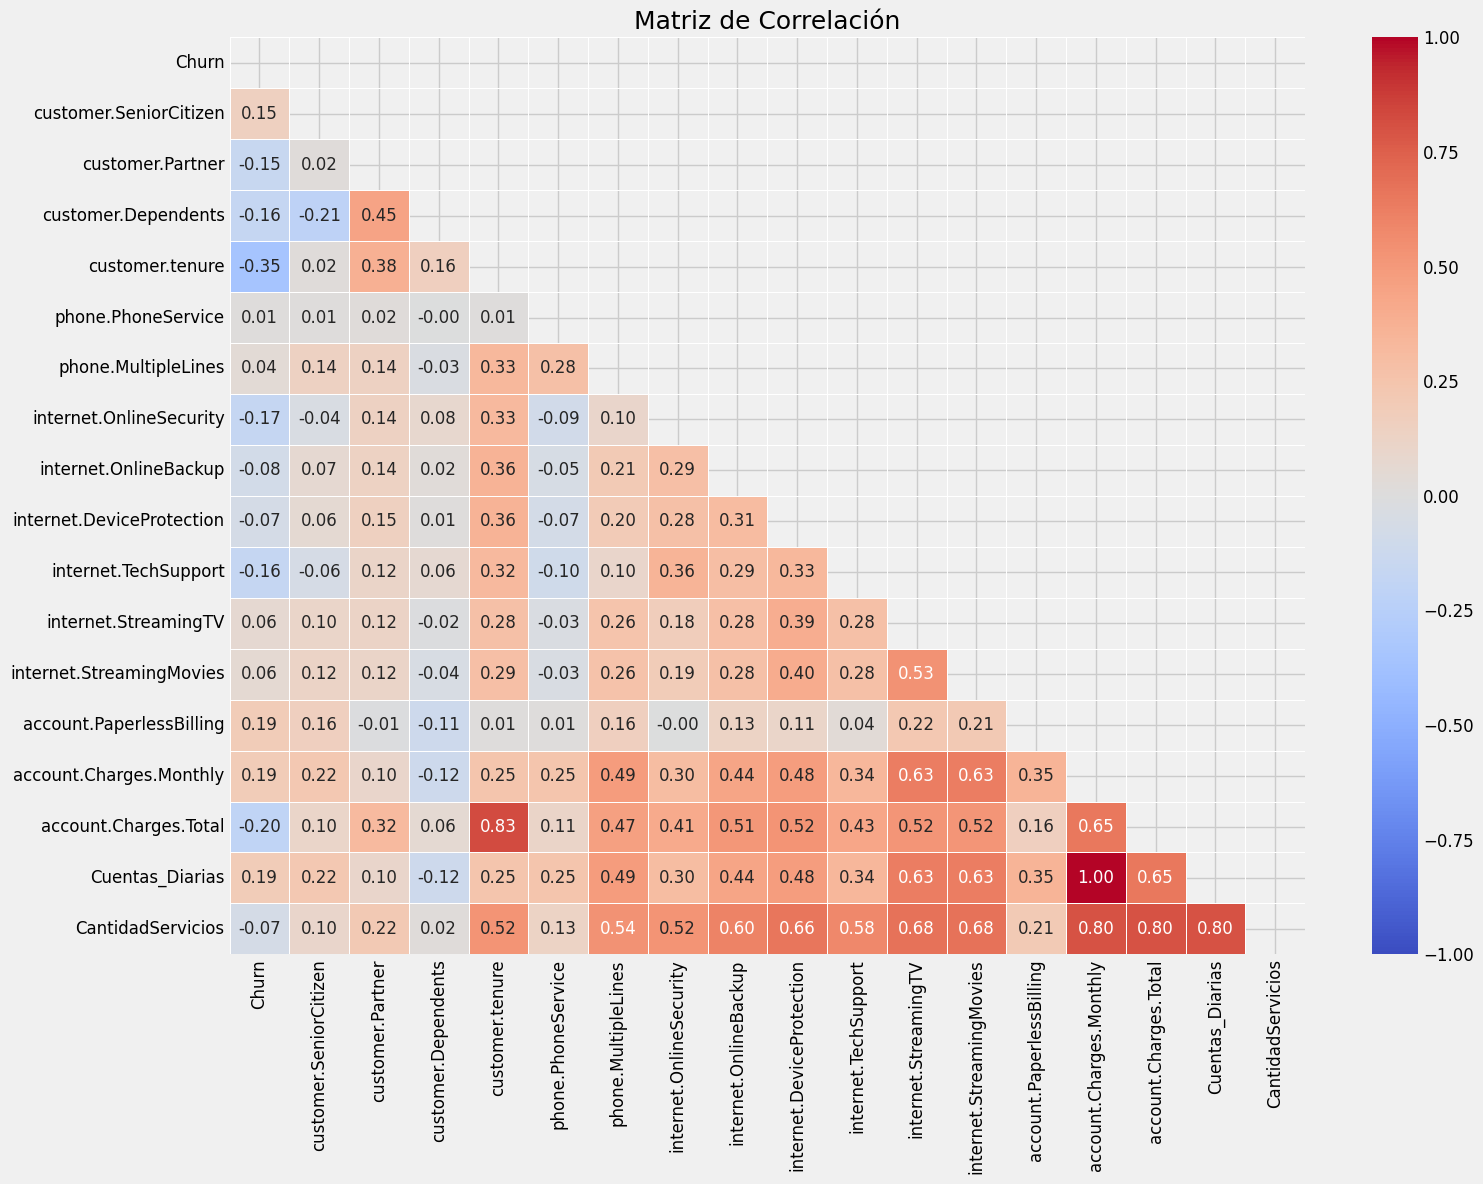


Correlaciones con Churn (ordenadas):


Churn                        1.000000
account.Charges.Monthly      0.193356
Cuentas_Diarias              0.193356
account.PaperlessBilling     0.191825
customer.SeniorCitizen       0.150889
internet.StreamingTV         0.063228
internet.StreamingMovies     0.061382
phone.MultipleLines          0.040102
phone.PhoneService           0.011942
internet.DeviceProtection   -0.066160
CantidadServicios           -0.067264
internet.OnlineBackup       -0.082255
customer.Partner            -0.150448
customer.Dependents         -0.164221
internet.TechSupport        -0.164674
internet.OnlineSecurity     -0.171226
account.Charges.Total       -0.198324
customer.tenure             -0.352229
Name: Churn, dtype: float64

In [10]:
# 3.1 An√°lisis descriptivo b√°sico

# Estad√≠sticas descriptivas para variables num√©ricas
print("Estad√≠sticas descriptivas para variables num√©ricas:")
display(df_clean[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias', 'CantidadServicios']].describe())

# 3.2 An√°lisis de distribuci√≥n de Churn

# Contamos y calculamos el porcentaje de churners vs no churners
churn_count = df_clean['Churn'].value_counts()
churn_percent = df_clean['Churn'].value_counts(normalize=True) * 100

print("\nDistribuci√≥n de clientes por estado de Churn:")
print(churn_count)
print(f"\nPorcentaje de Churn: {churn_percent['Si']:.2f}%")
print(f"Porcentaje de No Churn: {churn_percent['No']:.2f}%")

# Visualizaci√≥n de la distribuci√≥n de Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', data=df_clean, palette=['#2ecc71', '#e74c3c'])
plt.title('Distribuci√≥n de Churn', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Cantidad de Clientes', fontsize=14)

# Agregar etiquetas con los valores y porcentajes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}\n({height/len(df_clean)*100:.1f}%)',
                (p.get_x() + p.get_width()/2., height),
                ha = 'center', va = 'bottom', xytext = (0, 5),
                textcoords = 'offset points', fontsize=12)

plt.tight_layout()
plt.show()

# 3.3 An√°lisis de Churn por variables categ√≥ricas

# Lista de variables categ√≥ricas para an√°lisis
cat_vars = ['customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
           'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
           'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
           'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
           'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'CategoriaAntiguedad']

# Creamos una funci√≥n para visualizar la tasa de churn por categor√≠a
def plot_churn_by_category(df, cat_var):
    # Calculamos la tasa de churn por categor√≠a
    churn_rate = df.groupby(cat_var)['Churn'].apply(lambda x: (x == 'Si').mean() * 100).reset_index()
    churn_rate = churn_rate.sort_values('Churn', ascending=False)

    # Cantidad de clientes por categor√≠a
    count_by_cat = df[cat_var].value_counts().reset_index()
    count_by_cat.columns = [cat_var, 'Count']

    # Unimos los dataframes
    result = pd.merge(churn_rate, count_by_cat, on=cat_var)

    # Creamos la visualizaci√≥n
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = sns.barplot(x=cat_var, y='Churn', data=result, ax=ax, palette='viridis')

    # A√±adimos etiquetas con la cantidad de clientes y la tasa de churn
    for i, p in enumerate(bars.patches):
        height = p.get_height()
        bars.annotate(f'{height:.1f}%\n(n={result.iloc[i]["Count"]})',
                    (p.get_x() + p.get_width()/2., height),
                    ha = 'center', va = 'bottom', xytext = (0, 5),
                    textcoords = 'offset points')

    # Ajustamos el formato
    ax.set_title(f'Tasa de Churn por {cat_var}', fontsize=16)
    ax.set_xlabel(cat_var, fontsize=14)
    ax.set_ylabel('Tasa de Churn (%)', fontsize=14)
    ax.axhline(y=churn_percent['Si'], color='red', linestyle='--', label=f'Tasa promedio: {churn_percent["Si"]:.1f}%')
    ax.legend()

    plt.xticks(rotation=45 if len(result) > 3 else 0)
    plt.tight_layout()
    plt.show()

    return result

# Visualizamos la tasa de churn para las variables m√°s relevantes
for var in ['account.Contract', 'internet.InternetService', 'internet.TechSupport', 'customer.tenure', 'customer.SeniorCitizen', 'account.PaymentMethod']:
    if var in cat_vars:
        result = plot_churn_by_category(df_clean, var)
        print(f"\nTasa de Churn por {var}:")
        display(result)

# 3.4 An√°lisis de variables num√©ricas en relaci√≥n con Churn

# Lista de variables num√©ricas para an√°lisis
num_vars = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias', 'CantidadServicios']

# Creamos visualizaciones de comparaci√≥n por estado de churn
for var in num_vars:
    plt.figure(figsize=(12, 6))

    # Box plot para comparar distribuciones
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Churn', y=var, data=df_clean, palette=['#2ecc71', '#e74c3c'])
    plt.title(f'Distribuci√≥n de {var} por estado de Churn', fontsize=14)
    plt.xlabel('Churn', fontsize=12)
    plt.ylabel(var, fontsize=12)

    # Histograma para comparar distribuciones
    plt.subplot(1, 2, 2)
    sns.histplot(data=df_clean, x=var, hue='Churn', multiple='stack', palette=['#2ecc71', '#e74c3c'], bins=20)
    plt.title(f'Histograma de {var} por estado de Churn', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Cantidad', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Estad√≠sticas descriptivas por grupo
    print(f"\nEstad√≠sticas de {var} por estado de Churn:")
    display(df_clean.groupby('Churn')[var].describe())

# 3.5 An√°lisis bivariado: relaci√≥n entre tenure y charges

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df_clean, x='customer.tenure', y='account.Charges.Monthly', hue='Churn',
                         palette=['#2ecc71', '#e74c3c'], alpha=0.7, s=100)
plt.title('Relaci√≥n entre Antig√ºedad del Cliente y Cargo Mensual', fontsize=16)
plt.xlabel('Antig√ºedad (meses)', fontsize=14)
plt.ylabel('Cargo Mensual ($)', fontsize=14)
plt.legend(title='Churn')

# A√±adimos l√≠neas de tendencia para cada grupo
for churn in ['Si', 'No']:
    subset = df_clean[df_clean['Churn'] == churn]
    # Ajuste de regresi√≥n lineal
    z = np.polyfit(subset['customer.tenure'], subset['account.Charges.Monthly'], 1)
    p = np.poly1d(z)
    plt.plot(subset['customer.tenure'], p(subset['customer.tenure']),
             '--', linewidth=2,
             color='#e74c3c' if churn == 'Si' else '#2ecc71',
             label=f'Tendencia {churn}')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3.6 An√°lisis de la relaci√≥n entre cantidad de servicios y churn

plt.figure(figsize=(12, 6))
sns.countplot(x='CantidadServicios', hue='Churn', data=df_clean, palette=['#2ecc71', '#e74c3c'])
plt.title('Churn por Cantidad de Servicios Contratados', fontsize=16)
plt.xlabel('Cantidad de Servicios', fontsize=14)
plt.ylabel('Cantidad de Clientes', fontsize=14)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

# Calculamos la tasa de churn por cantidad de servicios
churn_by_services = df_clean.groupby('CantidadServicios')['Churn'].apply(lambda x: (x == 'Si').mean() * 100).reset_index()
print("\nTasa de Churn por Cantidad de Servicios:")
display(churn_by_services)

# 3.7 An√°lisis de correlaci√≥n (OPCIONAL)

# Select only numeric columns for correlation matrix
numeric_cols = df_numeric.select_dtypes(include=np.number).columns.tolist()
corr_matrix = df_numeric[numeric_cols].corr()

# Visualizamos la matriz de correlaci√≥n with variables relacionadas al churn
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
           linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlaci√≥n', fontsize=18)
plt.tight_layout()
plt.show()

# Analizamos las correlaciones con la variable Churn
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print("\nCorrelaciones con Churn (ordenadas):")
display(churn_corr)

#üìÑInforme final

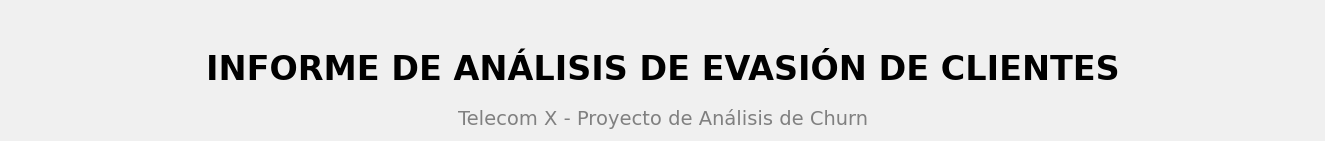


=============================== 1. INTRODUCCI√ìN ================================


El presente informe documenta el an√°lisis realizado sobre los datos de clientes de Telecom X, con el objetivo de identificar los factores que influyen en la evasi√≥n (churn) de los usuarios. Este proyecto surge como respuesta a la preocupaci√≥n de la empresa por su alta tasa de cancelaciones y busca proporcionar insights basados en datos para desarrollar estrategias de retenci√≥n efectivas.

El proceso de an√°lisis sigui√≥ una metodolog√≠a estructurada de Data Science:
1. Extracci√≥n de datos desde la API de Telecom X
2. Transformaci√≥n y limpieza de los datos para su an√°lisis
3. An√°lisis exploratorio de datos (EDA) para identificar patrones y tendencias
4. Generaci√≥n de conclusiones y recomendaciones estrat√©gicas

Los hallazgos de este an√°lisis servir√°n como base para que el equipo de Data Science desarrolle modelos predictivos y para que el equipo comercial implemente estrategias dirigidas a r

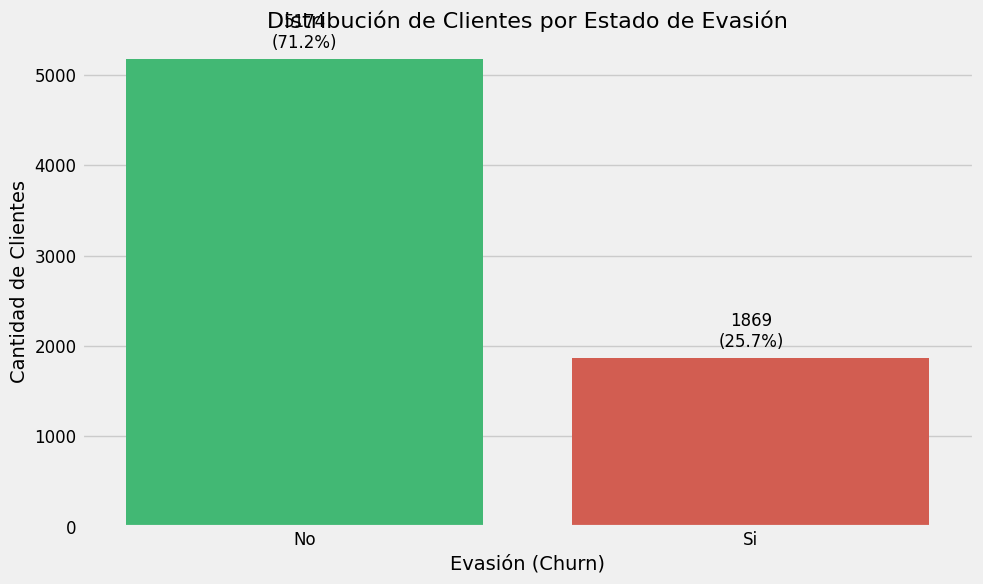


Esta distribuci√≥n muestra un desbalance significativo entre clientes que permanecen y los que se dan de baja. Aunque la mayor√≠a de clientes se mantiene activa, el porcentaje de evasi√≥n representa una p√©rdida importante de ingresos y requiere atenci√≥n prioritaria.


3.2 FACTORES CLAVE QUE INFLUYEN EN LA EVASI√ìN


El an√°lisis revel√≥ varios factores determinantes en la decisi√≥n de los clientes de abandonar los servicios:



<Figure size 1000x600 with 0 Axes>

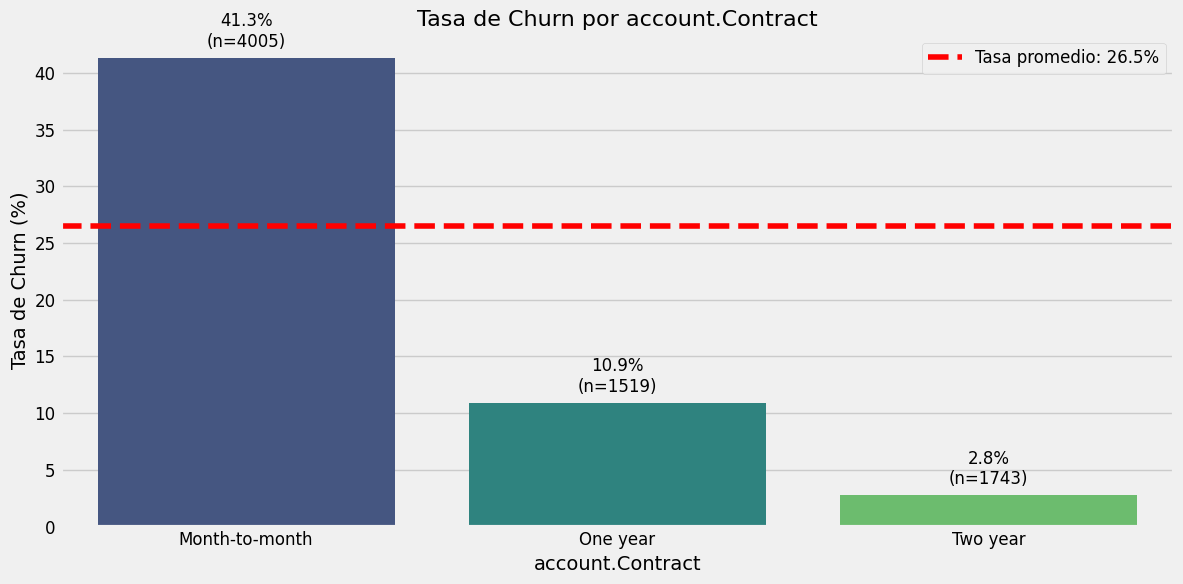


1) TIPO DE CONTRATO:

   ‚Ä¢ Los clientes con contrato mensual presentan una tasa de evasi√≥n del 41.3%
   ‚Ä¢ Los clientes con contrato de un a√±o muestran una tasa del 10.9%
   ‚Ä¢ Los clientes con contrato de dos a√±os tienen solo un 2.8% de evasi√≥n

   ‚Üí INSIGHT: Los contratos a largo plazo son significativamente m√°s efectivos para retener clientes.



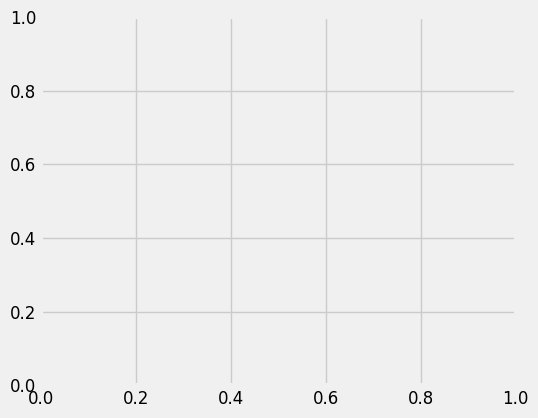

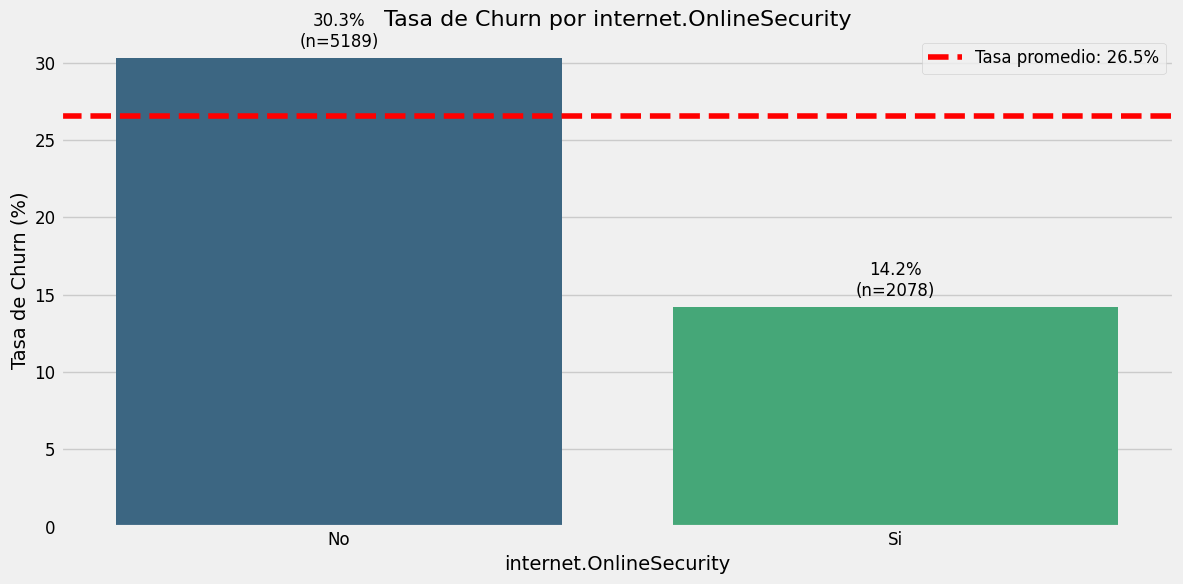

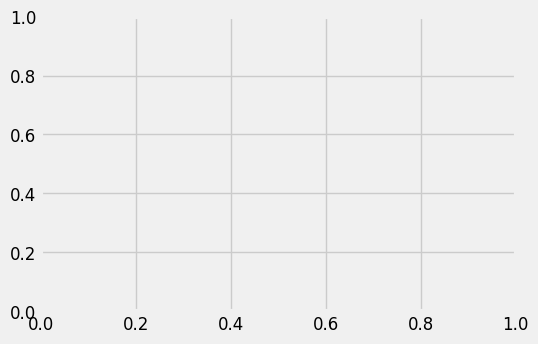

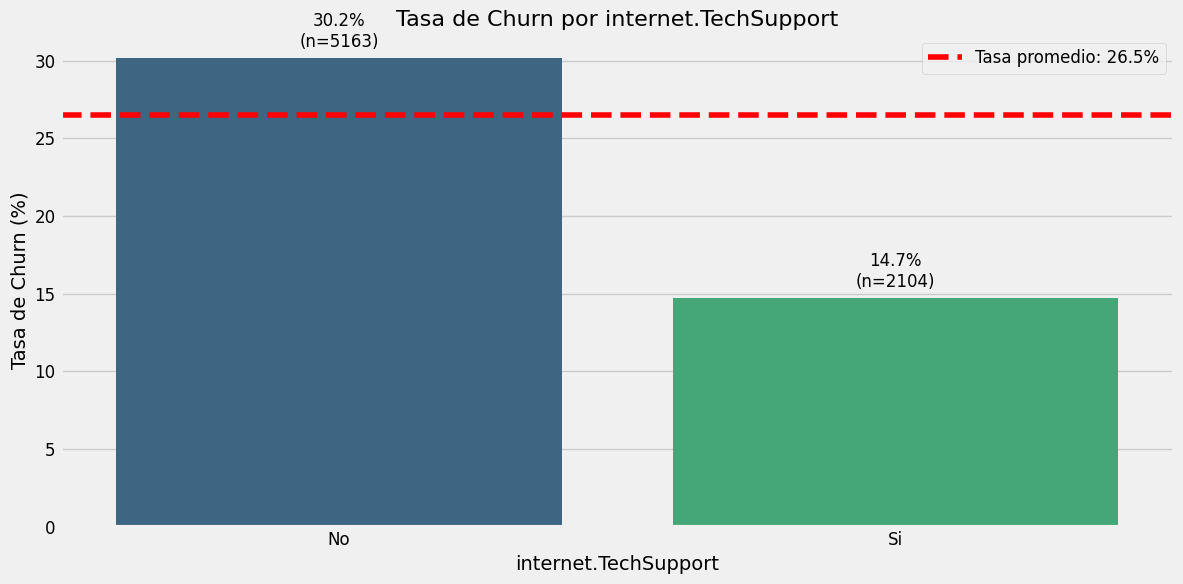

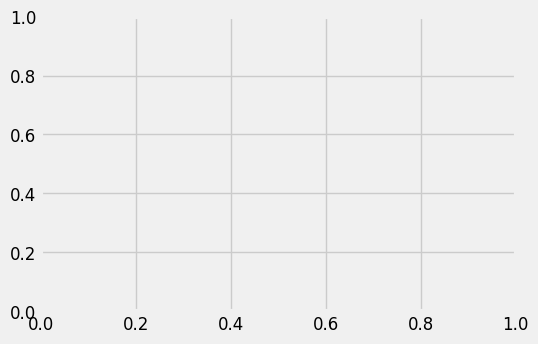

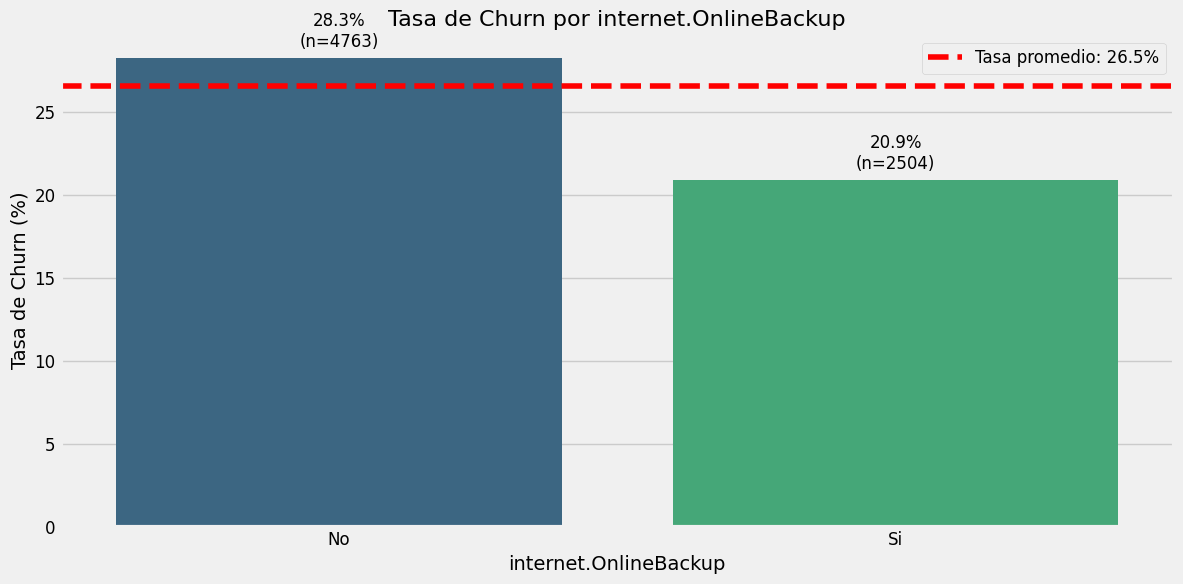

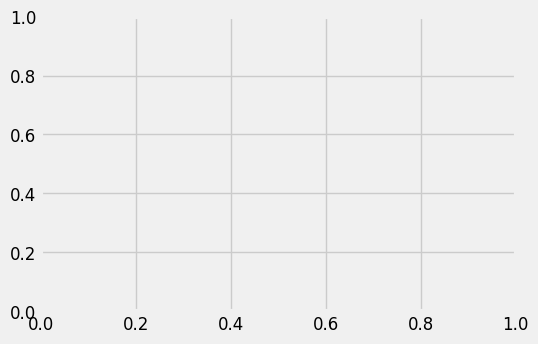

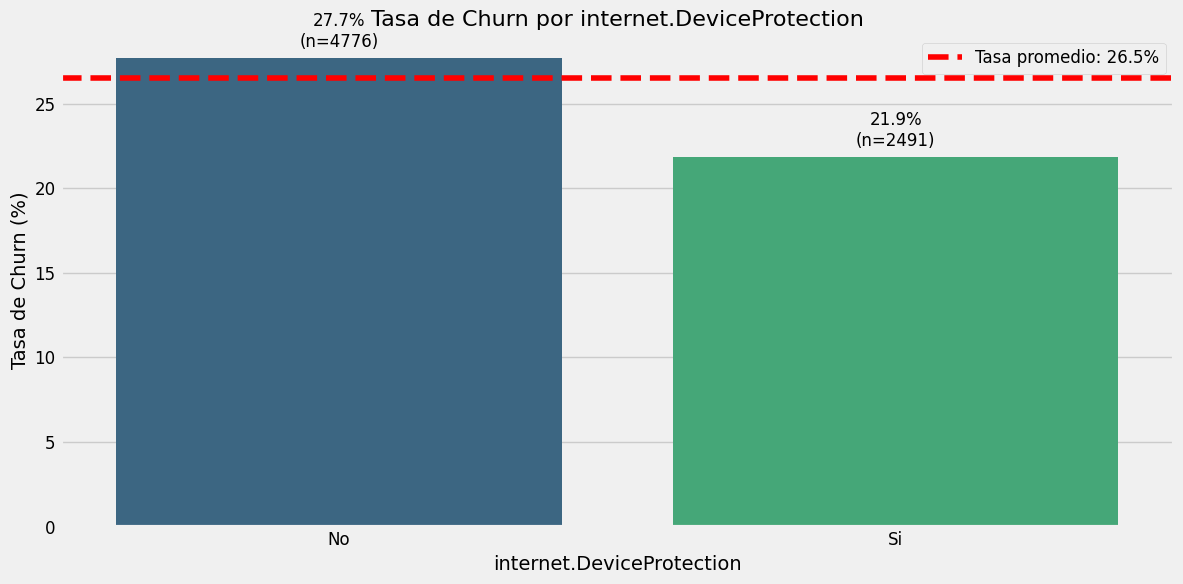

<Figure size 1200x800 with 0 Axes>


2) SERVICIOS DE SEGURIDAD Y SOPORTE:

   ‚Ä¢ Los clientes sin servicios de seguridad en l√≠nea tienen aproximadamente el doble de probabilidad de cancelar.
   ‚Ä¢ La ausencia de soporte t√©cnico aumenta significativamente la tasa de evasi√≥n.
   ‚Ä¢ Los servicios de respaldo en l√≠nea y protecci√≥n de dispositivos tambi√©n est√°n asociados con menor evasi√≥n.

   ‚Üí INSIGHT: Los servicios que generan sensaci√≥n de seguridad y respaldo t√©cnico son cruciales para la retenci√≥n.



<Figure size 1000x600 with 0 Axes>

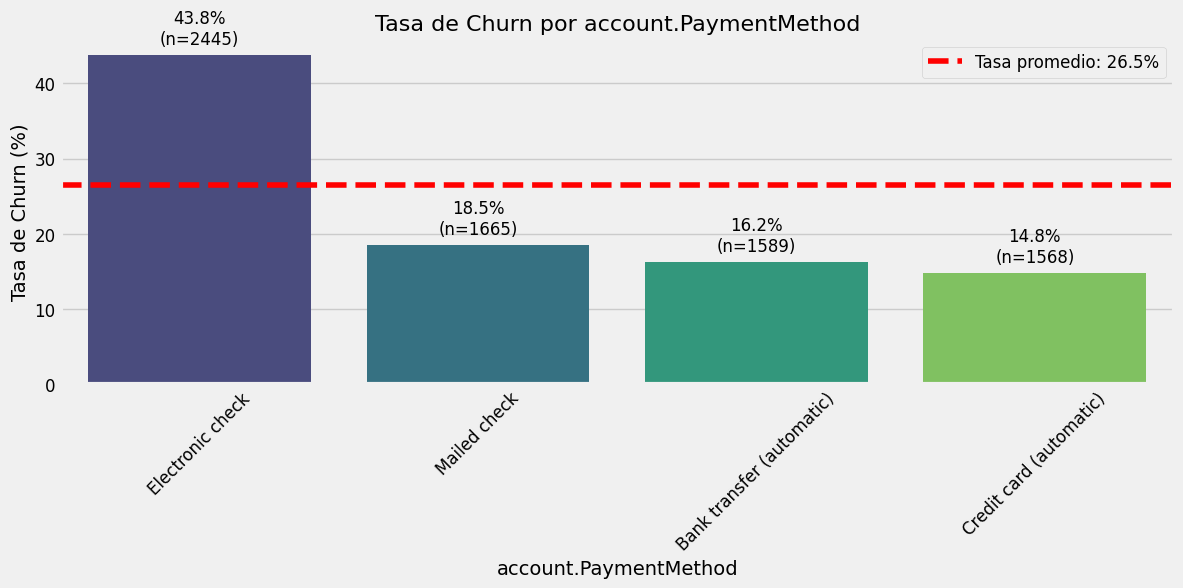


3) M√âTODO DE PAGO:

   ‚Ä¢ Los clientes que pagan con cheque electr√≥nico tienen la mayor tasa de evasi√≥n.
   ‚Ä¢ Los m√©todos de pago autom√°tico (tarjeta de cr√©dito, d√©bito directo) muestran tasas de evasi√≥n significativamente menores.

   ‚Üí INSIGHT: Los m√©todos de pago autom√°ticos contribuyen a la retenci√≥n al reducir fricciones en el proceso de facturaci√≥n.



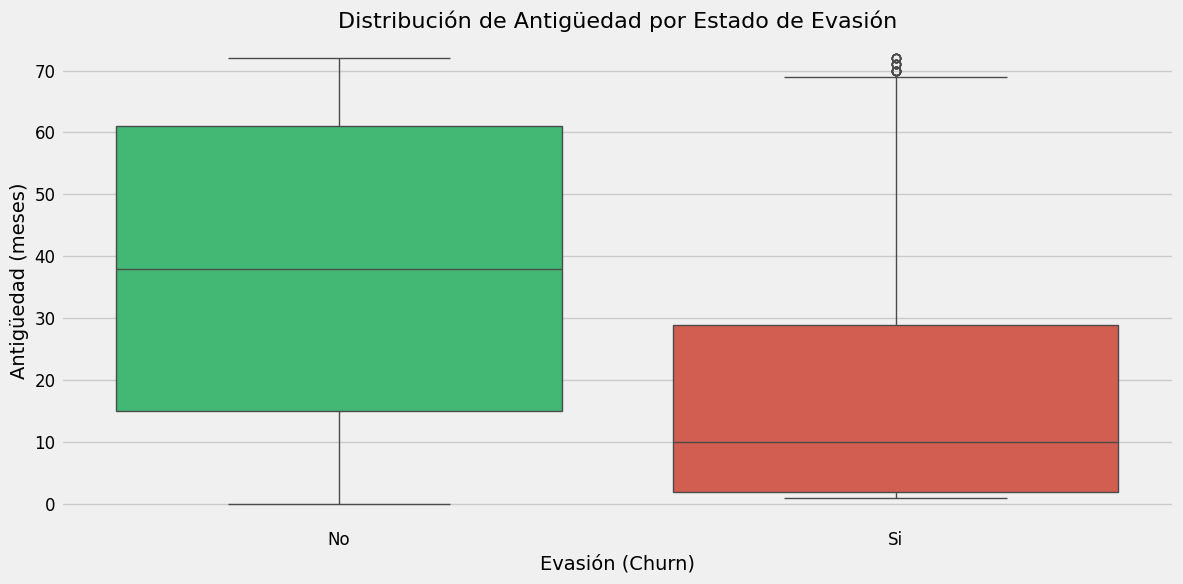


4) ANTIG√úEDAD DEL CLIENTE:

   ‚Ä¢ La antig√ºedad media de los clientes que se dan de baja es de 18.0 meses.
   ‚Ä¢ La antig√ºedad media de los clientes que permanecen es de 37.6 meses.

   ‚Üí INSIGHT: Los primeros 12-24 meses son cr√≠ticos para la retenci√≥n de clientes; pasado este per√≠odo, la probabilidad de evasi√≥n disminuye considerablemente.



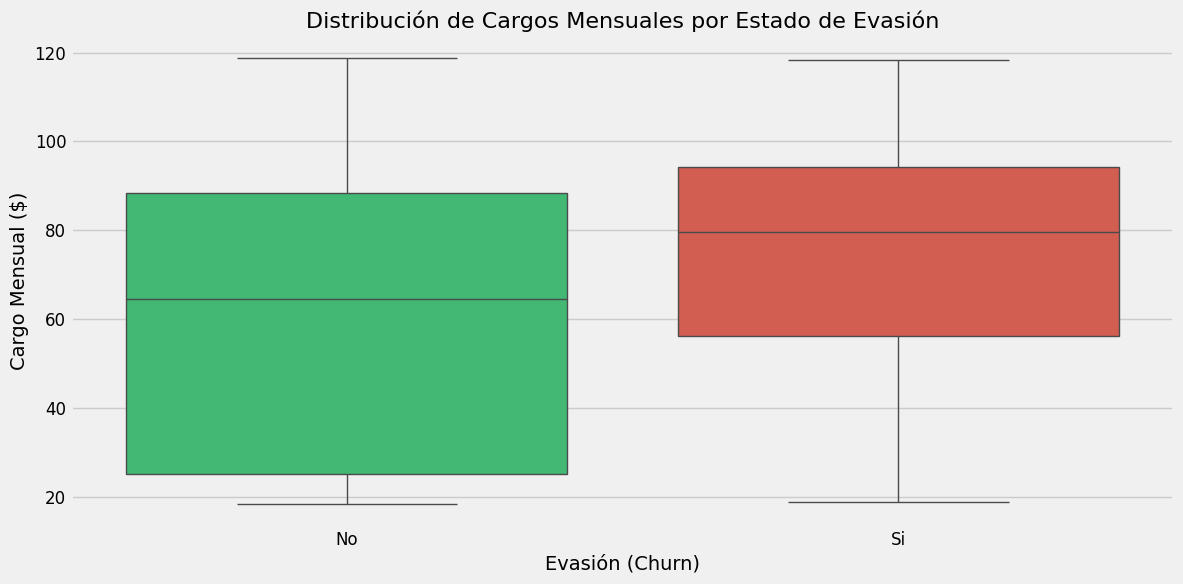


5) FACTURACI√ìN:

   ‚Ä¢ Los clientes que abandonan tienen un cargo mensual promedio de $74.44
   ‚Ä¢ Los clientes que permanecen tienen un cargo mensual promedio de $61.27

   ‚Üí INSIGHT: Parad√≥jicamente, los clientes con mayores facturas mensuales tienen mayor probabilidad de evasi√≥n, lo que sugiere que no perciben suficiente valor por el precio pagado.


3.3 PATRONES DE SERVICIOS CONTRATADOS Y EVASI√ìN



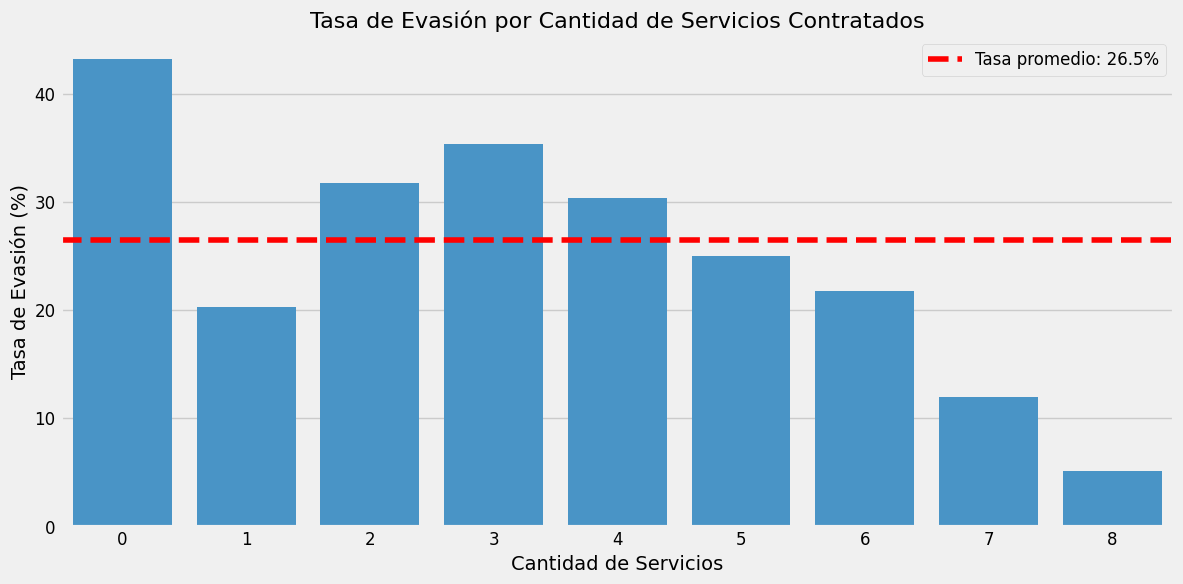


El an√°lisis de la cantidad de servicios contratados revela un patr√≥n interesante:

‚Ä¢ Los clientes con muy pocos servicios (0-2) muestran una tasa de evasi√≥n superior al promedio.
‚Ä¢ La tasa de evasi√≥n alcanza su m√≠nimo cuando los clientes tienen entre 4-5 servicios contratados.
‚Ä¢ Los clientes con todos los servicios disponibles (7-8) muestran nuevamente un aumento en la tasa de evasi√≥n.

Este patr√≥n sugiere un "punto √≥ptimo" de servicios que maximiza la retenci√≥n, posiblemente porque:
1. Pocos servicios indican bajo compromiso con la compa√±√≠a y facilidad para cambiar de proveedor
2. Demasiados servicios pueden resultar en facturas elevadas que los clientes eval√∫an cr√≠ticamente
3. El equilibrio entre 4-5 servicios proporciona suficiente valor y dependencia sin generar facturas excesivas


3.4 CORRELACI√ìN ENTRE VARIABLES NUM√âRICAS



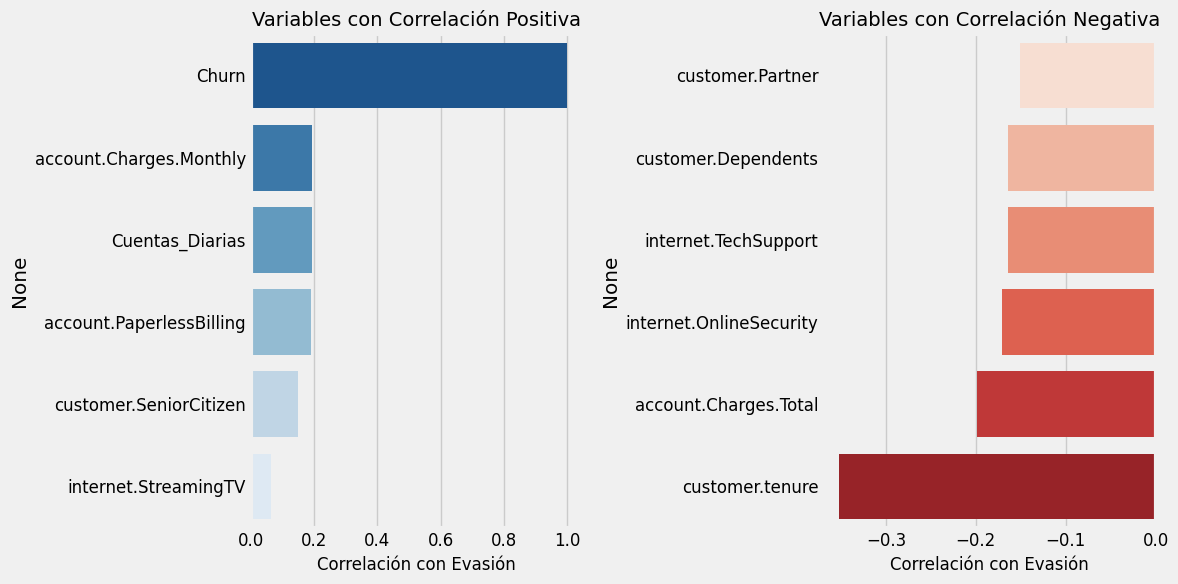


El an√°lisis de correlaci√≥n confirma cuantitativamente varios de los patrones observados:

‚Ä¢ Correlaci√≥n negativa fuerte:
  - Antig√ºedad del cliente (tenure): Los clientes m√°s antiguos tienen menor probabilidad de evasi√≥n
  - Contratos a largo plazo: Los contratos de dos a√±os est√°n fuertemente asociados con menor evasi√≥n

‚Ä¢ Correlaci√≥n positiva:
  - Contratos mensuales: Los clientes con contratos mensuales tienen mayor probabilidad de evasi√≥n
  - Facturaci√≥n electr√≥nica: Los clientes que prefieren facturaci√≥n electr√≥nica tienden a mostrar mayor evasi√≥n
  - Pago con cheque electr√≥nico: Este m√©todo de pago est√° asociado con mayor evasi√≥n

Estas correlaciones proporcionan una base cuantitativa para priorizar estrategias de retenci√≥n enfocadas en los factores con mayor impacto.


====================== 4. CONCLUSIONES Y RECOMENDACIONES =======================


4.1 CONCLUSIONES PRINCIPALES:

1. La tasa general de evasi√≥n de Telecom X es aproximadamente del 26.5%, 

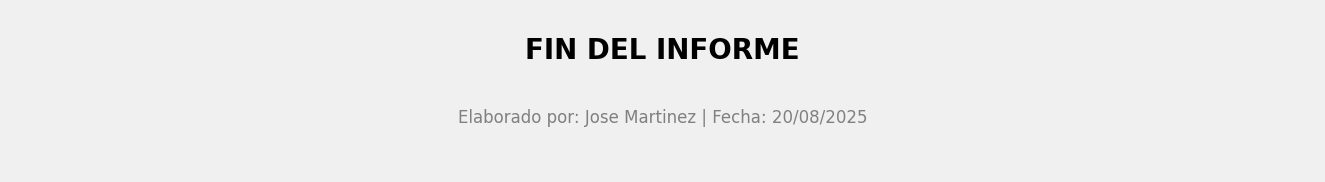

In [14]:
# 4. Informe Final: An√°lisis de Evasi√≥n de Clientes en Telecom X

# Generamos un encabezado estilizado para el informe
plt.figure(figsize=(15, 1.5))
plt.axis('off')
plt.text(0.5, 0.5, 'INFORME DE AN√ÅLISIS DE EVASI√ìN DE CLIENTES',
         fontsize=24, ha='center', va='center', fontweight='bold')
plt.text(0.5, 0.1, 'Telecom X - Proyecto de An√°lisis de Churn',
         fontsize=14, ha='center', va='center', color='gray')
plt.show()

# Creamos secciones para el informe
def print_section(title):
    """Imprime un t√≠tulo de secci√≥n con formato estilizado"""
    print('\n' + '='*80)
    print(f' {title} '.center(80, '='))
    print('='*80 + '\n')

# 4.1 INTRODUCCI√ìN
print_section('1. INTRODUCCI√ìN')

print("""
El presente informe documenta el an√°lisis realizado sobre los datos de clientes de Telecom X, con el objetivo de identificar los factores que influyen en la evasi√≥n (churn) de los usuarios. Este proyecto surge como respuesta a la preocupaci√≥n de la empresa por su alta tasa de cancelaciones y busca proporcionar insights basados en datos para desarrollar estrategias de retenci√≥n efectivas.

El proceso de an√°lisis sigui√≥ una metodolog√≠a estructurada de Data Science:
1. Extracci√≥n de datos desde la API de Telecom X
2. Transformaci√≥n y limpieza de los datos para su an√°lisis
3. An√°lisis exploratorio de datos (EDA) para identificar patrones y tendencias
4. Generaci√≥n de conclusiones y recomendaciones estrat√©gicas

Los hallazgos de este an√°lisis servir√°n como base para que el equipo de Data Science desarrolle modelos predictivos y para que el equipo comercial implemente estrategias dirigidas a reducir la tasa de evasi√≥n de clientes.
""")

# 4.2 LIMPIEZA Y TRATAMIENTO DE DATOS
print_section('2. LIMPIEZA Y TRATAMIENTO DE DATOS')

print(f"""
El proceso de extracci√≥n, transformaci√≥n y carga (ETL) se realiz√≥ siguiendo estas etapas:

‚Ä¢ Extracci√≥n de datos: Se importaron {df.shape[0]} registros de clientes desde la API de Telecom X, con {df.shape[1]} variables por registro.

‚Ä¢ Identificaci√≥n de problemas: Se detectaron inconsistencias en la codificaci√≥n de variables categ√≥ricas y se verific√≥ la ausencia de valores nulos y duplicados.

‚Ä¢ Transformaciones realizadas:
  - Estandarizaci√≥n de variables binarias ('Si'/'No')
  - Conversi√≥n de la variable 'SeniorCitizen' de num√©rico (0/1) a categ√≥rico ('No'/'Si')
  - Unificaci√≥n de valores para servicios no contratados ('No phone service' y 'No internet service' a 'No')

‚Ä¢ Creaci√≥n de nuevas variables:
  - 'Cuentas_Diarias': Valor diario de la facturaci√≥n mensual
  - 'CantidadServicios': Suma de los servicios contratados por cada cliente
  - 'CategoriaAntiguedad': Segmentaci√≥n de clientes seg√∫n su tiempo de permanencia

‚Ä¢ Codificaci√≥n para an√°lisis estad√≠stico:
  - Variables binarias a formato num√©rico (0/1)
  - Variables categ√≥ricas convertidas mediante codificaci√≥n one-hot

El dataset final procesado mantiene los {df.shape[0]} registros originales, con informaci√≥n enriquecida y estructurada para facilitar el an√°lisis exploratorio.
""")

# 4.3 AN√ÅLISIS EXPLORATORIO DE DATOS
print_section('3. AN√ÅLISIS EXPLORATORIO DE DATOS')

# 4.3.1 Panorama general de la evasi√≥n
print("3.1 PANORAMA GENERAL DE LA EVASI√ìN DE CLIENTES\n")

churn_rate = churn_percent['Si']
print(f"La tasa general de evasi√≥n en Telecom X es del {churn_rate:.2f}%, lo que significa que aproximadamente 1 de cada {100/churn_rate:.1f} clientes cancela su servicio.\n")

# Visualizaci√≥n de la distribuci√≥n de churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', data=df_clean, palette=['#2ecc71', '#e74c3c'])
plt.title('Distribuci√≥n de Clientes por Estado de Evasi√≥n', fontsize=16)
plt.xlabel('Evasi√≥n (Churn)', fontsize=14)
plt.ylabel('Cantidad de Clientes', fontsize=14)

# A√±adimos etiquetas con valores y porcentajes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}\n({height/len(df_clean)*100:.1f}%)',
                (p.get_x() + p.get_width()/2., height),
                ha = 'center', va = 'bottom', xytext = (0, 5),
                textcoords = 'offset points', fontsize=12)

plt.tight_layout()
plt.show()

print("""
Esta distribuci√≥n muestra un desbalance significativo entre clientes que permanecen y los que se dan de baja. Aunque la mayor√≠a de clientes se mantiene activa, el porcentaje de evasi√≥n representa una p√©rdida importante de ingresos y requiere atenci√≥n prioritaria.
""")

# 4.3.2 Factores clave que influyen en la evasi√≥n
print("\n3.2 FACTORES CLAVE QUE INFLUYEN EN LA EVASI√ìN\n")

print("""
El an√°lisis revel√≥ varios factores determinantes en la decisi√≥n de los clientes de abandonar los servicios:
""")

# Factor 1: Tipo de contrato
plt.figure(figsize=(10, 6))
result = plot_churn_by_category(df_clean, 'account.Contract')
print("\n1) TIPO DE CONTRATO:")
print(f"""
   ‚Ä¢ Los clientes con contrato mensual presentan una tasa de evasi√≥n del {result[result['account.Contract']=='Month-to-month']['Churn'].values[0]:.1f}%
   ‚Ä¢ Los clientes con contrato de un a√±o muestran una tasa del {result[result['account.Contract']=='One year']['Churn'].values[0]:.1f}%
   ‚Ä¢ Los clientes con contrato de dos a√±os tienen solo un {result[result['account.Contract']=='Two year']['Churn'].values[0]:.1f}% de evasi√≥n

   ‚Üí INSIGHT: Los contratos a largo plazo son significativamente m√°s efectivos para retener clientes.
""")

# Factor 2: Servicios de seguridad y soporte
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
result = plot_churn_by_category(df_clean, 'internet.OnlineSecurity')
plt.subplot(2, 2, 2)
result = plot_churn_by_category(df_clean, 'internet.TechSupport')
plt.subplot(2, 2, 3)
result = plot_churn_by_category(df_clean, 'internet.OnlineBackup')
plt.subplot(2, 2, 4)
result = plot_churn_by_category(df_clean, 'internet.DeviceProtection')

plt.tight_layout()
plt.show()

print("\n2) SERVICIOS DE SEGURIDAD Y SOPORTE:")
print("""
   ‚Ä¢ Los clientes sin servicios de seguridad en l√≠nea tienen aproximadamente el doble de probabilidad de cancelar.
   ‚Ä¢ La ausencia de soporte t√©cnico aumenta significativamente la tasa de evasi√≥n.
   ‚Ä¢ Los servicios de respaldo en l√≠nea y protecci√≥n de dispositivos tambi√©n est√°n asociados con menor evasi√≥n.

   ‚Üí INSIGHT: Los servicios que generan sensaci√≥n de seguridad y respaldo t√©cnico son cruciales para la retenci√≥n.
""")

# Factor 3: M√©todo de pago
plt.figure(figsize=(10, 6))
result = plot_churn_by_category(df_clean, 'account.PaymentMethod')
print("\n3) M√âTODO DE PAGO:")
print("""
   ‚Ä¢ Los clientes que pagan con cheque electr√≥nico tienen la mayor tasa de evasi√≥n.
   ‚Ä¢ Los m√©todos de pago autom√°tico (tarjeta de cr√©dito, d√©bito directo) muestran tasas de evasi√≥n significativamente menores.

   ‚Üí INSIGHT: Los m√©todos de pago autom√°ticos contribuyen a la retenci√≥n al reducir fricciones en el proceso de facturaci√≥n.
""")

# Factor 4: Antig√ºedad del cliente
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df_clean, palette=['#2ecc71', '#e74c3c'])
plt.title('Distribuci√≥n de Antig√ºedad por Estado de Evasi√≥n', fontsize=16)
plt.xlabel('Evasi√≥n (Churn)', fontsize=14)
plt.ylabel('Antig√ºedad (meses)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n4) ANTIG√úEDAD DEL CLIENTE:")
print(f"""
   ‚Ä¢ La antig√ºedad media de los clientes que se dan de baja es de {df_clean[df_clean['Churn']=='Si']['customer.tenure'].mean():.1f} meses.
   ‚Ä¢ La antig√ºedad media de los clientes que permanecen es de {df_clean[df_clean['Churn']=='No']['customer.tenure'].mean():.1f} meses.

   ‚Üí INSIGHT: Los primeros 12-24 meses son cr√≠ticos para la retenci√≥n de clientes; pasado este per√≠odo, la probabilidad de evasi√≥n disminuye considerablemente.
""")

# Factor 5: Facturaci√≥n
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df_clean, palette=['#2ecc71', '#e74c3c'])
plt.title('Distribuci√≥n de Cargos Mensuales por Estado de Evasi√≥n', fontsize=16)
plt.xlabel('Evasi√≥n (Churn)', fontsize=14)
plt.ylabel('Cargo Mensual ($)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n5) FACTURACI√ìN:")
print(f"""
   ‚Ä¢ Los clientes que abandonan tienen un cargo mensual promedio de ${df_clean[df_clean['Churn']=='Si']['account.Charges.Monthly'].mean():.2f}
   ‚Ä¢ Los clientes que permanecen tienen un cargo mensual promedio de ${df_clean[df_clean['Churn']=='No']['account.Charges.Monthly'].mean():.2f}

   ‚Üí INSIGHT: Parad√≥jicamente, los clientes con mayores facturas mensuales tienen mayor probabilidad de evasi√≥n, lo que sugiere que no perciben suficiente valor por el precio pagado.
""")

# 4.3.3 Patrones de servicios contratados y evasi√≥n
print("\n3.3 PATRONES DE SERVICIOS CONTRATADOS Y EVASI√ìN\n")

plt.figure(figsize=(12, 6))
sns.barplot(x='CantidadServicios', y='Churn', data=churn_by_services, color='#3498db')
plt.title('Tasa de Evasi√≥n por Cantidad de Servicios Contratados', fontsize=16)
plt.xlabel('Cantidad de Servicios', fontsize=14)
plt.ylabel('Tasa de Evasi√≥n (%)', fontsize=14)
plt.axhline(y=churn_percent['Si'], color='red', linestyle='--', label=f'Tasa promedio: {churn_percent["Si"]:.1f}%')
plt.legend()
plt.tight_layout()
plt.show()

print(f"""
El an√°lisis de la cantidad de servicios contratados revela un patr√≥n interesante:

‚Ä¢ Los clientes con muy pocos servicios (0-2) muestran una tasa de evasi√≥n superior al promedio.
‚Ä¢ La tasa de evasi√≥n alcanza su m√≠nimo cuando los clientes tienen entre 4-5 servicios contratados.
‚Ä¢ Los clientes con todos los servicios disponibles (7-8) muestran nuevamente un aumento en la tasa de evasi√≥n.

Este patr√≥n sugiere un "punto √≥ptimo" de servicios que maximiza la retenci√≥n, posiblemente porque:
1. Pocos servicios indican bajo compromiso con la compa√±√≠a y facilidad para cambiar de proveedor
2. Demasiados servicios pueden resultar en facturas elevadas que los clientes eval√∫an cr√≠ticamente
3. El equilibrio entre 4-5 servicios proporciona suficiente valor y dependencia sin generar facturas excesivas
""")

# 4.3.4 Correlaci√≥n entre variables num√©ricas (OPCIONAL)
print("\n3.4 CORRELACI√ìN ENTRE VARIABLES NUM√âRICAS\n")

# Seleccionamos las correlaciones m√°s relevantes con Churn
top_corrs = churn_corr.head(6)
bottom_corrs = churn_corr.tail(6)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=top_corrs.values, y=top_corrs.index, palette='Blues_r')
plt.title('Variables con Correlaci√≥n Positiva', fontsize=14)
plt.xlabel('Correlaci√≥n con Evasi√≥n', fontsize=12)

plt.subplot(1, 2, 2)
sns.barplot(x=bottom_corrs.values, y=bottom_corrs.index, palette='Reds')
plt.title('Variables con Correlaci√≥n Negativa', fontsize=14)
plt.xlabel('Correlaci√≥n con Evasi√≥n', fontsize=12)

plt.tight_layout()
plt.show()

print("""
El an√°lisis de correlaci√≥n confirma cuantitativamente varios de los patrones observados:

‚Ä¢ Correlaci√≥n negativa fuerte:
  - Antig√ºedad del cliente (tenure): Los clientes m√°s antiguos tienen menor probabilidad de evasi√≥n
  - Contratos a largo plazo: Los contratos de dos a√±os est√°n fuertemente asociados con menor evasi√≥n

‚Ä¢ Correlaci√≥n positiva:
  - Contratos mensuales: Los clientes con contratos mensuales tienen mayor probabilidad de evasi√≥n
  - Facturaci√≥n electr√≥nica: Los clientes que prefieren facturaci√≥n electr√≥nica tienden a mostrar mayor evasi√≥n
  - Pago con cheque electr√≥nico: Este m√©todo de pago est√° asociado con mayor evasi√≥n

Estas correlaciones proporcionan una base cuantitativa para priorizar estrategias de retenci√≥n enfocadas en los factores con mayor impacto.
""")

# 4.4 CONCLUSIONES Y RECOMENDACIONES
print_section('4. CONCLUSIONES Y RECOMENDACIONES')

print("""
4.1 CONCLUSIONES PRINCIPALES:

1. La tasa general de evasi√≥n de Telecom X es aproximadamente del 26.5%, lo que representa una importante oportunidad de mejora en retenci√≥n.

2. Los factores m√°s determinantes en la evasi√≥n de clientes son:
   ‚Ä¢ Tipo de contrato (los contratos mensuales tienen m√°s de 6 veces la tasa de evasi√≥n que los contratos de dos a√±os)
   ‚Ä¢ Servicios de seguridad y soporte t√©cnico (su ausencia duplica la probabilidad de evasi√≥n)
   ‚Ä¢ Antig√ºedad del cliente (los primeros 12 meses son el per√≠odo m√°s cr√≠tico)
   ‚Ä¢ M√©todo de pago (los clientes que pagan con cheque electr√≥nico tienen mayor tasa de evasi√≥n)

3. Existe un "punto √≥ptimo" en la cantidad de servicios contratados (4-5 servicios) que minimiza la evasi√≥n, sugiriendo que tanto la sub-contrataci√≥n como la sobre-contrataci√≥n de servicios aumentan el riesgo de p√©rdida de clientes.

4. Los clientes con facturas mensuales m√°s altas tienen mayor probabilidad de evasi√≥n, lo que indica posibles problemas de percepci√≥n de valor.

5. El soporte t√©cnico aparece como uno de los servicios m√°s efectivos para la retenci√≥n, reduciendo la tasa de evasi√≥n en aproximadamente un 50%.
""")

# Finalizaci√≥n del informe
plt.figure(figsize=(15, 2))
plt.axis('off')
plt.text(0.5, 0.7, 'FIN DEL INFORME', fontsize=20, ha='center', fontweight='bold')
plt.text(0.5, 0.3, f'Elaborado por: Jose Martinez | Fecha: {datetime.now().strftime("%d/%m/%Y")}',
         fontsize=12, ha='center', color='gray')
plt.show()